In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 支持中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示问题
import sys
print(sys.executable)

C:\WINDOWS\system32\venv\Scripts\python.exe


In [3]:
import tensorflow
import tensorboard
import tensorflow.keras.callbacks
import os

from tensorflow.keras.models import Sequential
from keras.layers import Input,Dense, Dropout,BatchNormalization,Activation
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.models import load_model

from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC
import sklearn
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error,mean_absolute_error, r2_score
# print("当前 scikit-learn 版本:", sklearn.__version__)
from scikeras.wrappers import KerasClassifier    # 关键包装
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold,cross_val_score, KFold


In [4]:
import scikeras,sklearn,xgboost,lightgbm
print(scikeras.__version__,sklearn.__version__,xgboost.__version__,lightgbm.__version__)
import tensorflow as tf
print("当前 tensorflow 版本:", tf.__version__)

0.13.0 1.4.2 2.1.2 4.6.0
当前 tensorflow 版本: 2.15.0


In [5]:
import numpy,shap
print(numpy.__version__,shap.__version__)

1.24.3 0.44.1


In [6]:
num = 63
train = pd.read_csv(f'../train_test_data/data_final_train_63_features.csv')
test = pd.read_csv(f'../train_test_data/data_final_test_63_features.csv')
print(train.shape)
print(test.shape)
X_train = train.drop(columns='转化率_1')
X_test = test.drop(columns='转化率_1')
y_train = train['转化率_1'].copy()  # 创建副本
y_test = test['转化率_1'].copy()  # 创建副本

y_train[y_train <= 1] = 0
y_test[y_test <= 1] = 0

y_train[y_train >= 2] = 1
y_test[y_test >= 2] = 1

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(19640, 64)
(3544, 64)
(19640, 63) (19640,)
(3544, 63) (3544,)


# 神经网络

🔹 先训练 KerasClassifier...
Epoch 1/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6501 - loss: 0.8835 - val_accuracy: 0.7553 - val_loss: 0.8072 - learning_rate: 1.0000e-04
Epoch 2/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7503 - loss: 0.7614 - val_accuracy: 0.7650 - val_loss: 0.7243 - learning_rate: 1.0000e-04
Epoch 3/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7714 - loss: 0.7161 - val_accuracy: 0.7729 - val_loss: 0.6934 - learning_rate: 1.0000e-04
Epoch 4/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7791 - loss: 0.6927 - val_accuracy: 0.7803 - val_loss: 0.6749 - learning_rate: 1.0000e-04
Epoch 5/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7864 - loss: 0.6715 - val_accuracy: 0.7856 - val_loss: 0.6630 - learning_rate: 1.0000e-04
Epoch 6/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7869 - loss: 0.6684 - val_accuracy: 0.7872 - val_loss: 0.6500 - learning_rate: 1.0000e-04
Epoch 7/1000
123/123 ━━━━━━

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8390 - loss: 0.4559 - val_accuracy: 0.8335 - val_loss: 0.4637 - learning_rate: 1.0000e-04
Epoch 44/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8375 - loss: 0.4574 - val_accuracy: 0.8330 - val_loss: 0.4611 - learning_rate: 1.0000e-04
Epoch 45/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8421 - loss: 0.4476 - val_accuracy: 0.8340 - val_loss: 0.4597 - learning_rate: 1.0000e-04
Epoch 46/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8454 - loss: 0.4355 - val_accuracy: 0.8343 - val_loss: 0.4574 - learning_rate: 1.0000e-04
Epoch 47/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8392 - loss: 0.4464 - val_accuracy: 0.8345 - val_loss: 0.4546 - learning_rate: 1.0000e-04
Epoch 48/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8467 - loss: 0.4288 - val_accuracy: 0.8325 - val_loss: 0.4529 - learning_rate: 1.0000e-04
Epoch 49/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8661 - loss: 0.3623 - val_accuracy: 0.8386 - val_loss: 0.4114 - learning_rate: 1.0000e-04
Epoch 86/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8666 - loss: 0.3563 - val_accuracy: 0.8371 - val_loss: 0.4138 - learning_rate: 1.0000e-04
Epoch 87/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8648 - loss: 0.3556 - val_accuracy: 0.8363 - val_loss: 0.4126 - learning_rate: 1.0000e-04
Epoch 88/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8664 - loss: 0.3533 - val_accuracy: 0.8353 - val_loss: 0.4114 - learning_rate: 1.0000e-04
Epoch 89/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8666 - loss: 0.3529 - val_accuracy: 0.8376 - val_loss: 0.4091 - learning_rate: 1.0000e-04
Epoch 90/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8765 - loss: 0.3408 - val_accuracy: 0.8376 - val_loss: 0.4101 - learning_rate: 1.0000e-04
Epoch 91/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8871 - loss: 0.3027 - val_accuracy: 0.8404 - val_loss: 0.4058 - learning_rate: 5.0000e-05
Epoch 128/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8837 - loss: 0.3062 - val_accuracy: 0.8378 - val_loss: 0.4067 - learning_rate: 5.0000e-05
Epoch 129/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8814 - loss: 0.3087 - val_accuracy: 0.8376 - val_loss: 0.4069 - learning_rate: 5.0000e-05
Epoch 130/1000
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8828 - loss: 0.3026 - val_accuracy: 0.8383 - val_loss: 0.4055 - learning_rate: 5.0000e-05


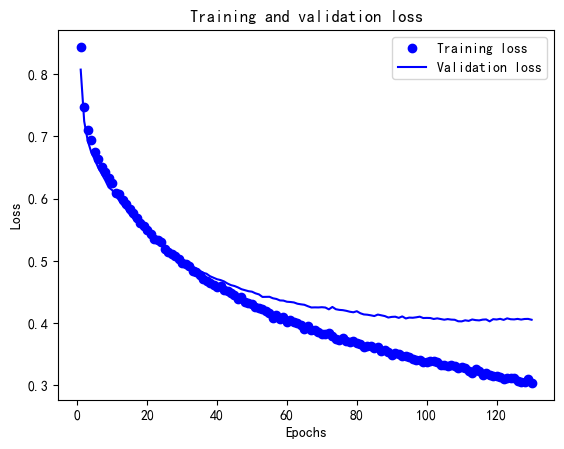

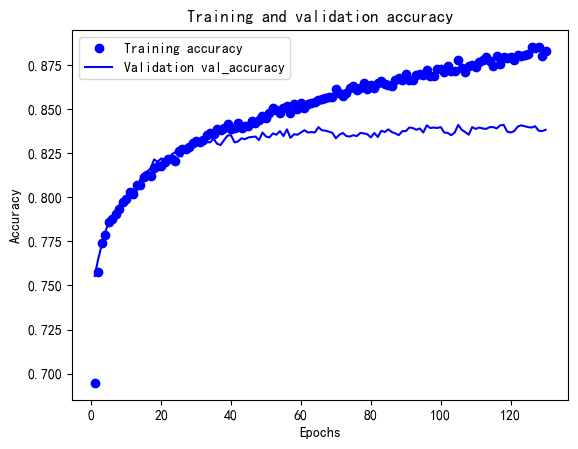

In [30]:
def create_keras_model():
    model = Sequential()
    model.add(Input(shape=(63,)))  
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    model.add(Dense(128, kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(64, kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # 二分类

    # ✅ 只用 accuracy，确保 VotingClassifier 解析不会出错
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])  
    
    return model

# ✅ 2. 创建回调
log_dir = "F:\\Graduate materials\\deep_log"
os.makedirs(log_dir, exist_ok=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
ReduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
tensorboard_callback = TensorBoard(log_dir=os.path.abspath(log_dir), histogram_freq=1)

callbacks_list = [early_stopping, ReduceLR, tensorboard_callback]

keras_clf = KerasClassifier(model=create_keras_model, 
                            epochs=1000,   # ✅ 先独立训练 MLP
                            batch_size=128, 
                            validation_split=0.2,
                            callbacks=callbacks_list,
                            verbose=1)  

print("🔹 先训练 KerasClassifier...")
history = keras_clf.fit(X_train, y_train)
keras_clf.model_.save("../model/MLP/MLP_trained.h5")

loss = history.history_['loss']
val_loss = history.history_['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy = history.history_['accuracy']
val_accuracy = history.history_['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation val_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

创建Keras解释器


PermutationExplainer explainer: 11it [00:14,  3.74s/it]                                                                


SHAP Summary 图像已保存至 ../result_picture/KerasClassifier/KerasClassifier_63_shap_explanation.png


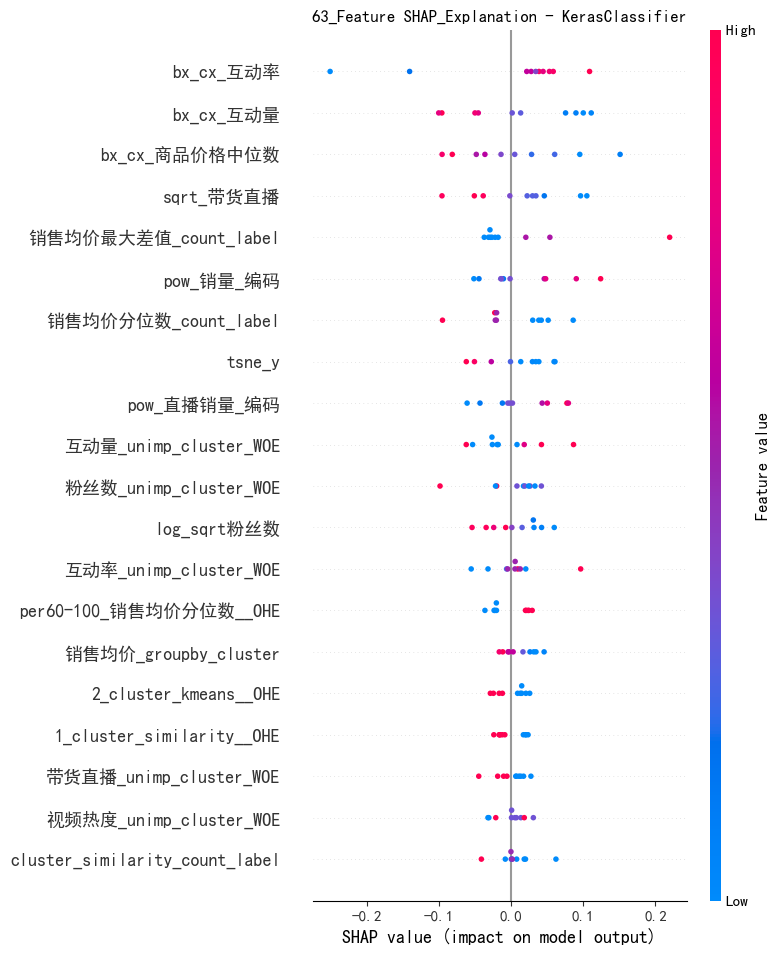

In [51]:
def plot_shap(model, test_data,max_display_num,n = len(X_test)):
    model_name = type(model).__name__    
    
    if isinstance(model, KerasClassifier):  
        model = model.model_  # 提取 Keras 模型
    
    if isinstance(model, tf.keras.Model):  # 仅适用于 Keras 模型
        print('创建Keras解释器')
        explainer = shap.Explainer(lambda x: model.predict(x, verbose=0), X_train)
    else:
        explainer = shap.Explainer(model)
    
    shap_values = explainer(X_test[:n])

    # 兼容不同模型
    if isinstance(shap_values, list):  # 二分类任务 (LGBM 和 RF 可能返回 list)
        shap_values = shap_values[1]  # 取正类 SHAP 值

#     # 计算每个特征的平均 SHAP 绝对值
#     shap_importance = np.abs(shap_values).mean(axis=0)

#     # 找出 SHAP 贡献极小的特征
#     low_importance_features = X_test.columns[shap_importance < 1e-5]
#     if low_importance_features.tolist():
#         print("SHAP 贡献极小的特征:", low_importance_features.tolist())
    
    save_path = f'../result_picture/{model_name}/{model_name}_{num}_shap_explanation.png'
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    
    plt.figure(figsize=(10, 10))
    
    shap.summary_plot(shap_values, X_test[:n], max_display=max_display_num, show=False)
    
    plt.title(f"{num}_Feature SHAP_Explanation - {model_name}")  # **动态添加模型名称**
    
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"SHAP Summary 图像已保存至 {save_path}")
    
    plt.show()
    
plot_shap(keras_clf, X_test,20,10)

# Voting

In [60]:
def create_loaded_model(**kwargs):
    model = load_model(f"../model/MLP/MLP_for_{num}_features.h5")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # 重新编译
    return model
keras_clf_load= KerasClassifier(model=create_loaded_model, epochs=0, probability=True) 
keras_clf_load

KerasClassifier(
	model=<function create_loaded_model at 0x0000027A918615A0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=0
	probability=True
	class_weight=None
)

In [66]:
# ✅ 加载其他模型
model_estimators = [('MLP',keras_clf_load)]
for model_name in ['XGBClassifier', 'LGBMClassifier']:
    model_path = f'../model/{model_name}/{model_name}_for_{num}_features.pkl'
    model = joblib.load(model_path)
    if model_name == 'LGBMClassifier':
        model.set_params(verbosity= -1)  
    if not hasattr(model, 'predict_proba'):
        raise ValueError(f"{model_name} does not support predict_proba")
    model_estimators.append((model_name, model))
voting_clf = VotingClassifier(estimators=model_estimators, voting='soft',weights=[1/3, 1/3, 1/3])
voting_clf

Trying to unpickle estimator LabelEncoder from version 1.3.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


VotingClassifier(estimators=[('MLP',
                              KerasClassifier(epochs=0, model=<function create_loaded_model at 0x0000027A918615A0>, probability=True)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7494049964621559,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=...
                                             learning_rate=0.12595864617336103,
                                             max_depth=12, min_child_samples=12,
                                             min_gain_to_split=0.216272796825761,
                                             n_estimators=1772, num_leaves=246,
                                             reg_alpha=0.025083202248968022,
                                             reg_lambda=0.16202781808390979,
                                             subsample=0.9737339978773515,
                                             subsample_for_bin=268373,
                                             verbosity=-1))],
                 voting='soft',
                 weights=[0.3333333333333333, 0.3333333333333333,
                          0.3333333333333333])

In [67]:
print("🔹 训练融合模型...")
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
print("分类报告：\n", classification_report(y_test, y_pred))
print("融合模型准确率：", accuracy_score(y_test, y_pred))

🔹 训练融合模型...
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
分类报告：
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      2267
           1       0.84      0.80      0.82      1277

    accuracy                           0.87      3544
   macro avg       0.87      0.86      0.86      3544
weighted avg       0.87      0.87      0.87      3544

融合模型准确率： 0.8738713318284425


In [101]:
# model_name = type(voting_clf).__name__
# save_path = f'..\model\{model_name}(with_MLP)\{model_name}(with_MLP)_for_{num}_features.pkl'
# os.makedirs(os.path.dirname(save_path), exist_ok=True)
# joblib.dump(voting_clf, save_path)
# voting_clf_load = joblib.load(save_path)
# voting_clf_load

PermutationExplainer explainer: 21it [00:38,  2.56s/it]                                                                
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


SHAP Summary 图像已保存至 ../result_picture/VotingClassifier(with_MLP)/VotingClassifier(with_MLP)_63_shap_explanation.png


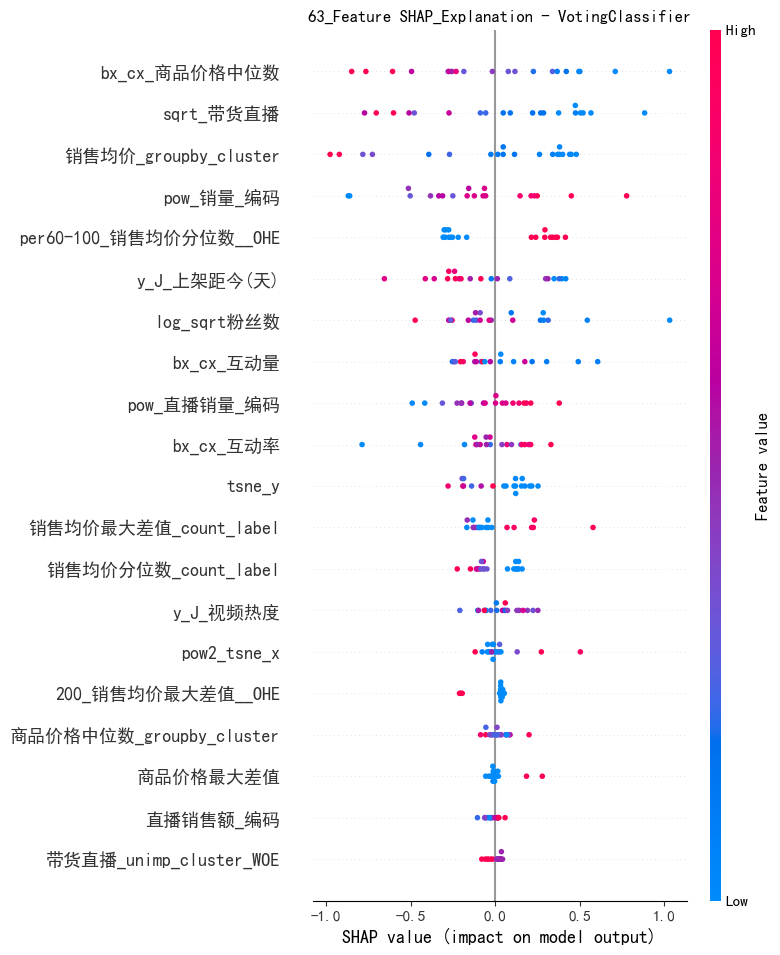

In [91]:
def plot_shap(voting_model, X_test,max_display_num,n = len(X_test)):

    xgb_model = voting_model.named_estimators_["XGBClassifier"]
    lgbm_model = voting_model.named_estimators_["LGBMClassifier"]
    mlp_model = voting_model.named_estimators_["MLP"]
#     rf_model = voting_model.named_estimators_["rf"]   

    mlp_explainer = shap.Explainer(lambda x: mlp_model.predict(x,verbose=0), X_train)
    mlp_shap_values = mlp_explainer.shap_values(X_test[:n])
    
    xgb_explainer = shap.TreeExplainer(xgb_model)
    xgb_shap_values = xgb_explainer.shap_values(X_test[:n])
    
    lgbm_explainer = shap.TreeExplainer(lgbm_model)
    lgbm_shap_values = lgbm_explainer.shap_values(X_test[:n])

    
#     # 计算 SHAP 值（RandomForest），禁用 additivity 检查
#     rf_explainer = shap.TreeExplainer(rf_model)
#     rf_shap_values = rf_explainer.shap_values(X_test[:n], check_additivity=False)

    # 解析 VotingClassifier 权重
    xgb_weight = voting_model.weights[0]
    lgbm_weight = voting_model.weights[1]
    mlp_weight = voting_model.weights[2]
#     rf_weight = voting_model.weights[1]
    # 处理 SHAP 值格式
    if isinstance(xgb_shap_values, list):  
        xgb_shap_values = np.array(xgb_shap_values[1])  # 取正类 SHAP

    if isinstance(lgbm_shap_values, list):  
        lgbm_shap_values = np.array(lgbm_shap_values[1])  # 取正类 SHAP
        
#     if isinstance(rf_shap_values, list):  
#         rf_shap_values = np.array(rf_shap_values[1])  # 取正类 SHAP

    # 计算 SHAP 加权平均（综合 VotingClassifier 权重）
    weighted_shap_values = (
        (xgb_shap_values * xgb_weight) + 
        (mlp_shap_values * mlp_weight) +
#         (rf_shap_values * rf_weight) + 
        (lgbm_shap_values * lgbm_weight)
    )

    # 创建 SHAP Explanation 结构，确保兼容 summary_plot
    shap_exp = shap.Explanation(
        values=weighted_shap_values,
        base_values=np.mean(weighted_shap_values, axis=0),
        data=X_test[:n]
    )


    model_name = type(voting_model).__name__
    save_path = f'../result_picture/{model_name}(with_MLP)/{model_name}(with_MLP)_{num}_shap_explanation.png'
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    
    plt.figure(figsize=(10, 10))
    
    shap.summary_plot(shap_exp, X_test[:n],max_display=max_display_num, show=False)
    
    plt.title(f"{num}_Feature SHAP_Explanation - {model_name}")  # **动态添加模型名称**
    
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"SHAP Summary 图像已保存至 {save_path}")
    plt.show()
    

plot_shap(voting_clf, X_test,20,20)


In [63]:
# y_proba = voting_clf.predict_proba(X_test)
# y_pred = voting_clf.predict(X_test)
# X_test_with_proba = X_test.copy()  # 复制原数据
# X_test_with_proba["prob_0"] = y_proba[:, 0]  # 预测为 0 的概率
# X_test_with_proba["prob_1"] = y_proba[:, 1]  # 预测为 1 的概率
# X_test_with_proba["actual"] = y_test
# X_test_with_proba["pred"] = y_pred
# X_test_with_proba.to_csv('X_test_with_proba.csv', index=False)

# Optuna超参数调优

In [69]:
import optuna
# ✅ 定义 VotingClassifier 目标函数
def voting_objective(trial):

#     # 🔹 搜索 XGBoost 超参数
#     xgb_params = {
#         'n_estimators': trial.suggest_int('xgb_n_estimators', 400, 2000),
#         'learning_rate': trial.suggest_float('xgb_learning_rate', 0.006, 0.6, log=True),
#         'gamma': trial.suggest_float('xgb_gamma', 0, 0.5),
#         'subsample': trial.suggest_float('xgb_subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.3, 1.0),
#         'max_depth': trial.suggest_int('xgb_max_depth', 3, 15),
#         'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 10),
#         'reg_lambda': trial.suggest_float('xgb_reg_lambda', 1e-9, 100.0, log=True),
#         'reg_alpha': trial.suggest_float('xgb_reg_alpha', 1e-9, 100.0, log=True),
#         'scale_pos_weight': trial.suggest_float('xgb_scale_pos_weight', 1.0, 5.0),
#         'tree_method': 'hist',
#         'objective': 'binary:logistic',
#         'booster': 'gbtree',
#         'device': 'gpu', 
#         'verbosity': 0
#     }

#     # 🔹 搜索 LightGBM 超参数
#     lgbm_params = {
#         'boosting_type': trial.suggest_categorical('lgbm_boosting_type', ['gbdt', 'dart']),
#         'num_leaves': trial.suggest_int('lgbm_num_leaves', 20, 400),
#         'learning_rate': trial.suggest_float('lgbm_learning_rate', 0.001, 0.5, log=True),
#         'n_estimators': trial.suggest_int('lgbm_n_estimators', 100, 2000),
#         'min_child_samples': trial.suggest_int('lgbm_min_child_samples', 5, 100),
#         'reg_alpha': trial.suggest_float('lgbm_reg_alpha', 1e-9, 10.0, log=True),
#         'reg_lambda': trial.suggest_float('lgbm_reg_lambda', 1e-9, 10.0, log=True),
#         'colsample_bytree': trial.suggest_float('lgbm_colsample_bytree', 0.4, 1.0),
#         'subsample': trial.suggest_float('lgbm_subsample', 0.6, 1.0),
#         'max_depth': trial.suggest_int('lgbm_max_depth', 3, 15),
#         'min_gain_to_split': trial.suggest_float('lgbm_min_gain_to_split', 0.0, 0.5),
#         'objective': 'binary',
#         'metric': 'binary_error',
#         'device': 'gpu', 
#         'random_state': 42
#     }

#     # 🔹 搜索 RandomForest 超参数
#     rf_params = {
#         'n_estimators': trial.suggest_int('rf_n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('rf_max_depth', 2, 20),
#         'min_samples_split': trial.suggest_int('rf_min_samples_split', 2, 20),
#         'min_samples_leaf': trial.suggest_int('rf_min_samples_leaf', 1, 20),
#         'max_features': trial.suggest_categorical('rf_max_features', ['sqrt', 'log2', None]),
#         'criterion': trial.suggest_categorical('rf_criterion', ['gini', 'entropy']),
#         'rf_bootstrap': trial.suggest_categorical('rf_bootstrap', [True, False]),
#         'rf_max_samples': trial.suggest_float('rf_max_samples', 0.5, 1.0) if trial.params.get("rf_bootstrap", True) else None,
#         'max_samples': trial.suggest_float('rf_max_samples', 0.5, 1.0),
#         'class_weight': trial.suggest_categorical('rf_class_weight', [None, 'balanced']),
#         'warm_start': trial.suggest_categorical('rf_warm_start', [True, False]),
#         'random_state': 42
#     }

    # 🔹 设定模型权重
    xgb_weight = trial.suggest_float("xgb_weight", 0.1, 0.7)
    lgbm_weight = trial.suggest_float("lgbm_weight", 0.1, 0.5)
    mlp_weight = 1.0 - (xgb_weight + lgbm_weight)
#     rf_weight = trial.suggest_float("rf_weight", 0.1, 0.4)
#     mlp_weight = 1.0 - (xgb_weight + rf_weight + lgbm_weight)

    if mlp_weight <= 0:
        return 0  # 忽略这个超参数组合

    # ✅ 组装 VotingClassifier
    voting_clf = VotingClassifier(
        estimators= model_estimators,
#         estimators=[
#             ('mlp', keras_clf_load),
#             ('xgboost', XGBClassifier(**xgb_params)),
#              ('rf', RandomForestClassifier(**rf_params)),
#             ('lgbm', LGBMClassifier(**lgbm_params)),
#         ],
        voting='soft',
        weights=[mlp_weight, xgb_weight, lgbm_weight],
#         weights=[mlp_weight, xgb_weight, lgbm_weight, rf_weight],
        n_jobs=-1
    )

    # ✅ 交叉验证
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scorer = make_scorer(accuracy_score)
    scores = cross_val_score(voting_clf, X_train, y_train, cv=cv, scoring=accuracy_scorer, n_jobs=-1)

    return scores.mean()

# ✅ 运行 Optuna 搜索最优超参数
study = optuna.create_study(direction="maximize",storage='sqlite:///voting.db',study_name='voting_weight_mlp_xgb_lgbm_63',load_if_exists=True)
study.optimize(voting_objective, n_trials=10)

print("最优超参数:", study.best_params)


[I 2025-03-13 14:02:23,230] A new study created in RDB with name: voting_weight_mlp_xgb_lgbm_63
[I 2025-03-13 14:05:40,106] Trial 0 finished with value: 0.900254582484725 and parameters: {'xgb_weight': 0.1734196723222875, 'lgbm_weight': 0.11907871859584165}. Best is trial 0 with value: 0.900254582484725.
[I 2025-03-13 14:09:26,367] Trial 1 finished with value: 0.8891038696537679 and parameters: {'xgb_weight': 0.3964153901788551, 'lgbm_weight': 0.18453571751887551}. Best is trial 0 with value: 0.900254582484725.
[I 2025-03-13 14:09:26,711] Trial 2 finished with value: 0.0 and parameters: {'xgb_weight': 0.6523896768656687, 'lgbm_weight': 0.41740079604665214}. Best is trial 0 with value: 0.900254582484725.
[I 2025-03-13 14:12:31,712] Trial 3 finished with value: 0.895723014256619 and parameters: {'xgb_weight': 0.12926717083245925, 'lgbm_weight': 0.31163070377039337}. Best is trial 0 with value: 0.900254582484725.
[I 2025-03-13 14:12:32,094] Trial 4 finished with value: 0.0 and parameters:

最优超参数: {'xgb_weight': 0.1734196723222875, 'lgbm_weight': 0.11907871859584165}


In [70]:
def fit_voting_model(Voting_best_hyperparameters):
    # 解析最佳参数
    best_params = Voting_best_hyperparameters.copy()

    # 解析模型权重
    lgbm_weight = best_params.pop("lgbm_weight")
    xgb_weight = best_params.pop("xgb_weight")
#     rf_weight = best_params.pop("rf_weight")
    mlp_weight = 1.0 - (xgb_weight + lgbm_weight)  # 确保权重和为 1

    # 确保 LGBM 权重合法
    if mlp_weight <= 0:
        raise ValueError("MLP weight calculated as <= 0. Check Voting_best_hyperparameters.")

    # 分离 XGBoost、RandomForest 和 LightGBM 参数
#     xgb_params = {k.replace("xgb_", ""): v for k, v in best_params.items() if k.startswith("xgb_")}
#     rf_params = {k.replace("rf_", ""): v for k, v in best_params.items() if k.startswith("rf_")}
#     lgbm_params = {k.replace("lgbm_", ""): v for k, v in best_params.items() if k.startswith("lgbm_")}

    
#     print("XGBoost Parameters:", xgb_params,"xgb_weight",xgb_weight)
#     print("RandomForest Parameters:", rf_params,"rf_weight",rf_weight)
#     print("LightGBM Parameters:", lgbm_params,"lgbm_weight",lgbm_weight)
# print('mlp_weight:',mlp_weight ,'xgb_weight:',xgb_weight ,'lgbm_weight:',lgbm_weight)

    voting_model = VotingClassifier(
        estimators= model_estimators,
#         estimators=[('mlp', keras_clf_load),
#                     ('xgboost', XGBClassifier(**xgb_params)), 
# #                   ('rf', RandomForestClassifier(**rf_params)),
#                     ('lgbm', LGBMClassifier(**lgbm_params))],
        voting='soft',
        weights=[mlp_weight, xgb_weight, lgbm_weight],
#         weights=[mlp_weight, xgb_weight, lgbm_weight, rf_weight],
        n_jobs=-1
    )
    
    
    voting_model.fit(X_train, y_train)
    y_pred = voting_model.predict(X_test)

    
    print("分类报告：\n", classification_report(y_test, y_pred))
    print("准确率：", accuracy_score(y_test, y_pred))

    return voting_model

Voting_best_hyperparameters = study.best_params
Voting_model = fit_voting_model(Voting_best_hyperparameters)

Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 


111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
分类报告：
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2267
           1       0.83      0.80      0.81      1277

    accuracy                           0.87      3544
   macro avg       0.86      0.85      0.86      3544
weighted avg       0.87      0.87      0.87      3544

准确率： 0.8682279909706546
